In [ ]:
#PDR Spatial Analysis

In [ ]:
#Attempting to map combined parcel and zoning data from first worksheet

In [1]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
parceldata = gpd.read_file('filteredpdr.csv')

In [ ]:
#Seeing whether the csv file is being read correctly

In [4]:
type(parceldata)

geopandas.geodataframe.GeoDataFrame

In [5]:
parceldata.head()

,field_1,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,geometry,zoning,geometry
0,14738,14710,4793001B,5500,0,PDR,0,5484.87963388,PDR-2,True,MULTIPOLYGON (((-122.38172846694592 37.7254965...,PDR-2,MULTIPOLYGON (((-122.38172846694592 37.7254965...
1,14739,14711,4357004,4873,13365,MIXED,6003,13603.993112600001,PDR-2,True,MULTIPOLYGON (((-122.38574307007826 37.7502624...,PDR-2,MULTIPOLYGON (((-122.38574307007826 37.7502624...
2,69874,69851,3552009,0,0,RETAIL/ENT,0,18324.895471400003,PDR-1-G,True,MULTIPOLYGON (((-122.41552495288843 37.7660867...,PDR-1-G,MULTIPOLYGON (((-122.41552495288843 37.7660867...
3,69876,69853,3552013,0,5000,PDR,0,13212.498673799999,PDR-1-G,True,MULTIPOLYGON (((-122.41651291865504 37.7653523...,PDR-1-G,MULTIPOLYGON (((-122.41651291865504 37.7653523...
4,69933,69911,3551003,23522,8020,MIXED,3272,17571.244674200003,PDR-1-G,True,MULTIPOLYGON (((-122.41328098872894 37.7655474...,PDR-1-G,MULTIPOLYGON (((-122.41328098872894 37.7655474...


In [6]:
type(parceldata.geometry)

geopandas.geoseries.GeoSeries

In [ ]:
#Fixing glitch where geometry column is repeated

In [3]:
parceldata3 = gpd.read_file("filteredpdr.csv", GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [7]:
parceldata3.head()

,field_1,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning,geometry
0,14738,14710,4793001B,5500,0,PDR,0,5484.87963388,PDR-2,True,PDR-2,(POLYGON ((-122.3817284669459 37.7254965541782...
1,14739,14711,4357004,4873,13365,MIXED,6003,13603.993112600001,PDR-2,True,PDR-2,(POLYGON ((-122.3857430700783 37.7502624526935...
2,69874,69851,3552009,0,0,RETAIL/ENT,0,18324.895471400003,PDR-1-G,True,PDR-1-G,(POLYGON ((-122.4155249528884 37.7660867626118...
3,69876,69853,3552013,0,5000,PDR,0,13212.498673799999,PDR-1-G,True,PDR-1-G,(POLYGON ((-122.416512918655 37.76535232313464...
4,69933,69911,3551003,23522,8020,MIXED,3272,17571.244674200003,PDR-1-G,True,PDR-1-G,(POLYGON ((-122.4132809887289 37.7655474018695...


In [ ]:
#Testing whether I can map the parcel data

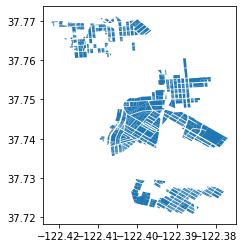

In [4]:
#All PDR zoned parcels in SF

parceldata3.plot()

plt.show()

In [5]:
%%capture
!pip install geoplot;

In [6]:
import geoplot

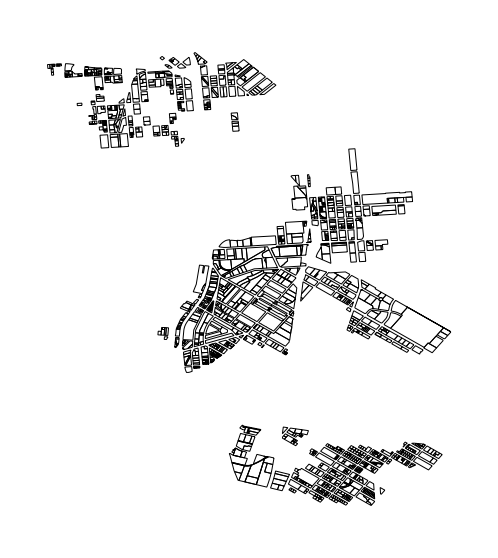

In [9]:
geoplot.polyplot(parceldata3, figsize=(12,10))

plt.show()

In [24]:
#Looking at my filtered data more closely, a lot of the numerical data is not registering properly
parceldata3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 12 columns):
field_1        1448 non-null object
objectid       1448 non-null object
blklot         1448 non-null object
bldgsf         1448 non-null object
totuses        1448 non-null object
landuse        1448 non-null object
pdr            1448 non-null object
parcelarea     1448 non-null object
zoning_code    1448 non-null object
active         1448 non-null object
zoning         1448 non-null object
geometry       1448 non-null object
dtypes: object(12)
memory usage: 135.8+ KB


In [28]:
#Converting building square feet to integers
parceldata3['bldgsf2'] = parceldata3['bldgsf'].astype('int')

In [29]:
parceldata3.head()

,field_1,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning,geometry,bldgsf2
0,14738,14710,4793001B,5500,0,PDR,0,5484.87963388,PDR-2,True,PDR-2,(POLYGON ((-122.3817284669459 37.7254965541782...,5500
1,14739,14711,4357004,4873,13365,MIXED,6003,13603.993112600001,PDR-2,True,PDR-2,(POLYGON ((-122.3857430700783 37.7502624526935...,4873
2,69874,69851,3552009,0,0,RETAIL/ENT,0,18324.895471400003,PDR-1-G,True,PDR-1-G,(POLYGON ((-122.4155249528884 37.7660867626118...,0
3,69876,69853,3552013,0,5000,PDR,0,13212.498673799999,PDR-1-G,True,PDR-1-G,(POLYGON ((-122.416512918655 37.76535232313464...,0
4,69933,69911,3551003,23522,8020,MIXED,3272,17571.244674200003,PDR-1-G,True,PDR-1-G,(POLYGON ((-122.4132809887289 37.7655474018695...,23522


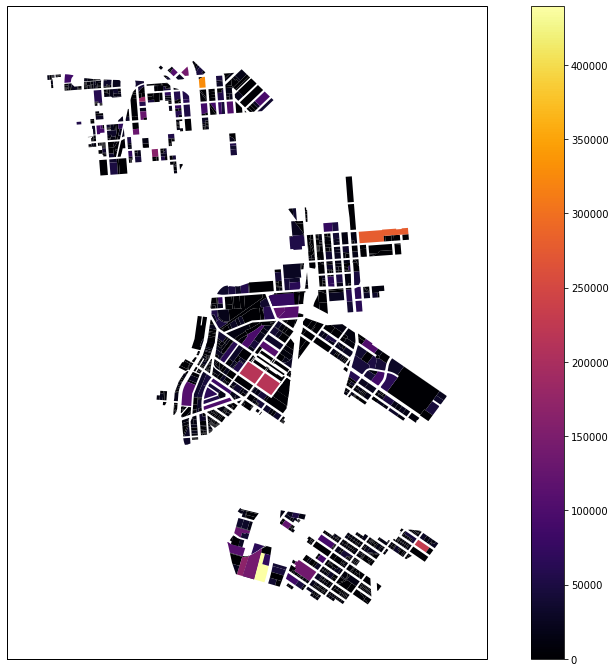

In [37]:
# Mapping building square feet with a choropleth. It looks like a lot of buidlings in PDR districts are below 50,000sf
# I can tell this data isn't up-to-date or has missing data because there are a few new and older PDR buildings that are over 50,000sf not shown in color

ax = geoplot.choropleth(parceldata3, hue='bldgsf2', figsize=(16,12), legend=True, cmap='inferno', projection=geoplot.crs.Robinson())

ax.outline_patch.set_visible(True)  
plt.show()